In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder

In [2]:
# path = "C://Users//kenny//OneDrive - purdue.edu//Documents//Kenny's File//Transportation Literature//Fall 2024//CE 699 Ph.D. Thesis//evwatts//"
# path = "//nas01.itap.purdue.edu//puhome//My Documents//Downloads//evwatts.public.zip//evwatts.public//"
# evse_data = pd.read_csv(path + "evwatts_public_evse.csv")
evse_data = pd.read_csv("evwatts_public_evse.csv")
# (36926, 8)
# connector_data = pd.read_csv(path + "evwatts_public_connector.csv")
connector_data = pd.read_csv("evwatts_public_connector.csv")
# (50103, 5)
# session_data = pd.read_csv(path + "evwatts_public_session.csv")
session_data = pd.read_csv("evwatts_public_session.csv")
# (13937235, 11)

In [3]:
evse_data.head()

,evse_id,metro_area,land_use,region,num_ports,charge_level,venue,pricing
0,6034,Undesignated,Metro Area,Mountain,1,DCFC,Corridor,Paid
1,6065,Undesignated,Metro Area,Mountain,1,DCFC,Corridor,Paid
2,6100,"Phoenix-Mesa-Chandler, AZ Metro Area",Metro Area,Mountain,1,DCFC,Undesignated,Free
3,6155,Undesignated,Metro Area,Mountain,1,DCFC,Corridor,Paid
4,1315,"Denver-Aurora-Lakewood, CO Metro Area",Metro Area,Mountain,1,DCFC,Corridor,Free


In [4]:
connector_data.head()

,connector_id,evse_id,connector_number,connector_type,power_kw
0,38494,25683,1,J1772,>8 kW
1,38358,27850,1,J1772,>8 kW
2,44144,31875,1,J1772,>8 kW
3,45088,32971,1,J1772,>8 kW
4,9643,5712,1,J1772,<8 kW


In [5]:
session_data.head()

,session_id,evse_id,connector_id,start_datetime,end_datetime,total_duration,charge_duration,energy_kwh,start_soc,end_soc,flag_id
0,11562,5,5,2020-03-01 09:37:44,2020-03-01 11:14:59,1.621389,1.615556,6.170,NaN,NaN,0
1,11563,116,116,2020-03-01 10:02:24,2020-03-01 11:08:14,1.096944,1.089722,5.212,NaN,NaN,0
2,11564,72,72,2020-03-01 10:06:08,2020-03-01 11:08:10,1.033611,1.024722,3.392,NaN,NaN,0
3,11565,1,1,2020-03-01 10:01:12,2020-03-01 11:07:09,1.099722,1.076111,6.521,NaN,NaN,0
4,11566,0,138,2020-02-29 19:09:03,2020-03-01 10:47:16,15.636667,12.658889,80.527,NaN,NaN,0


In [6]:
merged_data_1 = pd.merge(connector_data, session_data, on=['connector_id', 'evse_id'])
# (13490534, 14)

In [7]:
merged_data_1.head()

,connector_id,evse_id,connector_number,connector_type,power_kw,session_id,start_datetime,end_datetime,total_duration,charge_duration,energy_kwh,start_soc,end_soc,flag_id
0,38494,25683,1,J1772,>8 kW,8213869,2022-01-30 01:00:00,2022-01-30 05:00:00,4.001389,0.094444,0.7140,NaN,NaN,0
1,38494,25683,1,J1772,>8 kW,8213870,2022-02-19 23:00:00,2022-02-20 03:00:00,4.001389,0.205556,0.6803,NaN,NaN,0
2,38494,25683,1,J1772,>8 kW,8213871,2022-03-23 09:12:41,2022-03-23 17:37:42,8.416111,4.835000,5.0672,NaN,NaN,0
3,38494,25683,1,J1772,>8 kW,8213872,2022-03-24 01:00:00,2022-03-24 07:00:00,6.001389,5.855833,13.1817,NaN,NaN,0
4,38494,25683,1,J1772,>8 kW,8213873,2022-02-02 01:00:00,2022-02-02 05:00:00,4.001389,0.931944,1.9063,NaN,NaN,0


In [8]:
combined_data = pd.merge(merged_data_1, evse_data, on='evse_id')
# 12697572

In [9]:
combined_data = combined_data[~combined_data['flag_id'].isin([1, 2, 4, 8, 16
                                                             ,32, 64, 128, 256, 512
                                                             ,1024, 2048, 4096, 8192, 16384
                                                             ,32768, 65536])]

In [10]:
combined_data.columns

Index(['connector_id', 'evse_id', 'connector_number', 'connector_type',
       'power_kw', 'session_id', 'start_datetime', 'end_datetime',
       'total_duration', 'charge_duration', 'energy_kwh', 'start_soc',
       'end_soc', 'flag_id', 'metro_area', 'land_use', 'region', 'num_ports',
       'charge_level', 'venue', 'pricing'],
      dtype='object')

In [11]:
combined_data['energy_kwh'].head()

0     0.7140
1     0.6803
2     5.0672
3    13.1817
4     1.9063
Name: energy_kwh, dtype: float64

In [12]:
combined_data['energy_kwh'].describe()

count    1.269757e+07
mean     1.733596e+01
std      2.185408e+01
min      0.000000e+00
25%      5.433000e+00
50%      1.107000e+01
75%      2.301000e+01
max      9.362060e+02
Name: energy_kwh, dtype: float64

In [13]:
combined_data.head()

,connector_id,evse_id,connector_number,connector_type,power_kw,session_id,start_datetime,end_datetime,total_duration,charge_duration,...,start_soc,end_soc,flag_id,metro_area,land_use,region,num_ports,charge_level,venue,pricing
0,38494,25683,1,J1772,>8 kW,8213869,2022-01-30 01:00:00,2022-01-30 05:00:00,4.001389,0.094444,...,NaN,NaN,0,Undesignated,Undesignated,East North Central,1,L2,Single Family Residential,Free
1,38494,25683,1,J1772,>8 kW,8213870,2022-02-19 23:00:00,2022-02-20 03:00:00,4.001389,0.205556,...,NaN,NaN,0,Undesignated,Undesignated,East North Central,1,L2,Single Family Residential,Free
2,38494,25683,1,J1772,>8 kW,8213871,2022-03-23 09:12:41,2022-03-23 17:37:42,8.416111,4.835000,...,NaN,NaN,0,Undesignated,Undesignated,East North Central,1,L2,Single Family Residential,Free
3,38494,25683,1,J1772,>8 kW,8213872,2022-03-24 01:00:00,2022-03-24 07:00:00,6.001389,5.855833,...,NaN,NaN,0,Undesignated,Undesignated,East North Central,1,L2,Single Family Residential,Free
4,38494,25683,1,J1772,>8 kW,8213873,2022-02-02 01:00:00,2022-02-02 05:00:00,4.001389,0.931944,...,NaN,NaN,0,Undesignated,Undesignated,East North Central,1,L2,Single Family Residential,Free


In [14]:
combined_data['uncharged_duration'] = combined_data['total_duration'] - combined_data['charge_duration']

In [15]:
combined_data['charge_inefficieny_%'] = (combined_data['uncharged_duration']/combined_data['total_duration'])*100

In [16]:
# date, weekday, and time of day

# Assuming df is your DataFrame with start_datetime and end_datetime columns
combined_data['start_datetime'] = pd.to_datetime(combined_data['start_datetime'])
combined_data['end_datetime'] = pd.to_datetime(combined_data['end_datetime'])

# Extract year
combined_data['year'] = combined_data['start_datetime'].dt.year

# Extract month
combined_data['month'] = combined_data['start_datetime'].dt.month

# Extract day of the week
combined_data['start_day'] = combined_data['start_datetime'].dt.day_name()
combined_data['end_day'] = combined_data['end_datetime'].dt.day_name()

# Extract if weekday (1) or weekend (0)
combined_data['start_is_weekday'] = combined_data['start_datetime'].dt.weekday.apply(lambda x: 1 if x < 5 else 0)
combined_data['end_is_weekday'] = combined_data['end_datetime'].dt.weekday.apply(lambda x: 1 if x < 5 else 0)

# Extract hour (time of day)
combined_data['start_hour'] = combined_data['start_datetime'].dt.hour
combined_data['end_hour'] = combined_data['end_datetime'].dt.hour

def classify_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Apply the function to classify the start and end times
combined_data['start_time_of_day'] = combined_data['start_hour'].apply(classify_time_of_day)
combined_data['end_time_of_day'] = combined_data['end_hour'].apply(classify_time_of_day)

In [17]:
combined_data.dropna()

,connector_id,evse_id,connector_number,connector_type,power_kw,session_id,start_datetime,end_datetime,total_duration,charge_duration,...,year,month,start_day,end_day,start_is_weekday,end_is_weekday,start_hour,end_hour,start_time_of_day,end_time_of_day
3326,30380,22424,2,CHAdeMO,30 kW - 100 kW,4873405,2021-08-18 11:00:45,2021-08-18 12:10:15,1.158056,1.142778,...,2021,8,Wednesday,Wednesday,1,1,11,12.0,Morning,Afternoon
3327,30380,22424,2,CHAdeMO,30 kW - 100 kW,4911258,2021-08-15 14:25:15,2021-08-15 15:03:34,0.638333,0.621667,...,2021,8,Sunday,Sunday,0,0,14,15.0,Afternoon,Afternoon
3329,30380,22424,2,CHAdeMO,30 kW - 100 kW,4943970,2021-07-18 09:01:53,2021-07-18 09:44:30,0.710000,0.683333,...,2021,7,Sunday,Sunday,0,0,9,9.0,Morning,Morning
3330,30380,22424,2,CHAdeMO,30 kW - 100 kW,4944267,2021-08-29 20:51:27,2021-08-29 21:46:41,0.920556,0.899444,...,2021,8,Sunday,Sunday,0,0,20,21.0,Evening,Night
3332,30380,22424,2,CHAdeMO,30 kW - 100 kW,4977825,2021-07-22 17:47:58,2021-07-22 18:16:10,0.470000,0.445278,...,2021,7,Thursday,Thursday,1,1,17,18.0,Evening,Evening
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13490529,42001,30211,1,Combo,<30 kW,11053357,2022-07-07 09:09:13,2022-07-07 12:27:23,3.302778,3.302778,...,2022,7,Thursday,Thursday,1,1,9,12.0,Morning,Afternoon
13490530,42001,30211,1,Combo,<30 kW,12607166,2022-12-30 10:26:55,2022-12-30 12:03:58,1.617500,1.617500,...,2022,12,Friday,Friday,1,1,10,12.0,Morning,Afternoon
13490531,42001,30211,1,Combo,<30 kW,12630415,2022-12-29 12:45:29,2022-12-29 12:58:13,0.212222,0.212222,...,2022,12,Thursday,Thursday,1,1,12,12.0,Afternoon,Afternoon
13490532,42001,30211,1,Combo,<30 kW,12694523,2022-12-23 13:25:16,2022-12-23 15:13:39,1.806389,1.806389,...,2022,12,Friday,Friday,1,1,13,15.0,Afternoon,Afternoon


In [18]:
combined_data.shape

(12697572, 33)

In [19]:
combined_data['metro_area'].unique()

array(['Undesignated', 'Albany-Schenectady-Troy, NY Metro Area',
       'Ann Arbor, MI Metro Area',
       'Austin-Round Rock-Georgetown, TX Metro Area',
       'Baltimore-Columbia-Towson, MD Metro Area',
       'Boston-Cambridge-Newton, MA-NH Metro Area',
       'Boulder, CO Metro Area',
       'Burlington-South Burlington, VT Metro Area',
       'Chicago-Naperville-Elgin, IL-IN-WI Metro Area',
       'Detroit-Warren-Dearborn, MI Metro Area',
       'Dallas-Fort Worth-Arlington, TX Metro Area',
       'Denver-Aurora-Lakewood, CO Metro Area',
       'Des Moines-West Des Moines, IA Metro Area',
       'Grand Rapids-Kentwood, MI Metro Area',
       'Las Vegas-Henderson-Paradise, NV Metro Area',
       'Kansas City, MO-KS Metro Area',
       'Los Angeles-Long Beach-Anaheim, CA Metro Area',
       'Miami-Fort Lauderdale-Pompano Beach, FL Metro Area',
       'New York-Newark-Jersey City, NY-NJ-PA Metro Area',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD Metro Area',
       'Pittsburg

In [20]:
combined_data['venue'].unique()

array(['Single Family Residential', 'Municipal Building', 'Corridor',
       'Medical or Educational Campus', 'Multi-Unit Dwelling', 'Retail',
       'Leisure Destination', 'Business Office',
       'Multi-use Parking Garage/Lot', 'Hotel', 'Undesignated', 'Fleet',
       'Transit Facility'], dtype=object)

In [21]:
combined_data.head()

,connector_id,evse_id,connector_number,connector_type,power_kw,session_id,start_datetime,end_datetime,total_duration,charge_duration,...,year,month,start_day,end_day,start_is_weekday,end_is_weekday,start_hour,end_hour,start_time_of_day,end_time_of_day
0,38494,25683,1,J1772,>8 kW,8213869,2022-01-30 01:00:00,2022-01-30 05:00:00,4.001389,0.094444,...,2022,1,Sunday,Sunday,0,0,1,5.0,Night,Morning
1,38494,25683,1,J1772,>8 kW,8213870,2022-02-19 23:00:00,2022-02-20 03:00:00,4.001389,0.205556,...,2022,2,Saturday,Sunday,0,0,23,3.0,Night,Night
2,38494,25683,1,J1772,>8 kW,8213871,2022-03-23 09:12:41,2022-03-23 17:37:42,8.416111,4.835000,...,2022,3,Wednesday,Wednesday,1,1,9,17.0,Morning,Evening
3,38494,25683,1,J1772,>8 kW,8213872,2022-03-24 01:00:00,2022-03-24 07:00:00,6.001389,5.855833,...,2022,3,Thursday,Thursday,1,1,1,7.0,Night,Morning
4,38494,25683,1,J1772,>8 kW,8213873,2022-02-02 01:00:00,2022-02-02 05:00:00,4.001389,0.931944,...,2022,2,Wednesday,Wednesday,1,1,1,5.0,Night,Morning


In [22]:
# Count NaN values for all columns
nan_counts = combined_data.isna().sum()

# Display the result in the desired format
for column, count in nan_counts.items():
    print(f"{column}: {count}")

connector_id: 0
evse_id: 0
connector_number: 0
connector_type: 0
power_kw: 0
session_id: 0
start_datetime: 0
end_datetime: 3
total_duration: 3
charge_duration: 0
energy_kwh: 0
start_soc: 10288816
end_soc: 10275395
flag_id: 0
metro_area: 0
land_use: 0
region: 0
num_ports: 0
charge_level: 0
venue: 0
pricing: 0
uncharged_duration: 3
charge_inefficieny_%: 25
year: 0
month: 0
start_day: 0
end_day: 3
start_is_weekday: 0
end_is_weekday: 0
start_hour: 0
end_hour: 3
start_time_of_day: 0
end_time_of_day: 0


## charge_level

In [23]:
# print(unique_values)
value_counts = combined_data['charge_level'].value_counts()
value_counts

charge_level
L2      10207223
DCFC     2490349
Name: count, dtype: int64

In [24]:
L2_eff = combined_data[combined_data['charge_level'] == 'L2'] 
L2_eff = L2_eff.dropna(subset=['charge_inefficieny_%'])
L2_eff = L2_eff[(L2_eff['charge_inefficieny_%'] > 0) & (L2_eff['charge_inefficieny_%'] < 100)]

L3_eff = combined_data[combined_data['charge_level'] == 'DCFC'] 
L3_eff = L3_eff.dropna(subset=['charge_inefficieny_%'])
L3_eff = L3_eff[(L3_eff['charge_inefficieny_%'] > 0) & (L3_eff['charge_inefficieny_%'] < 100)]

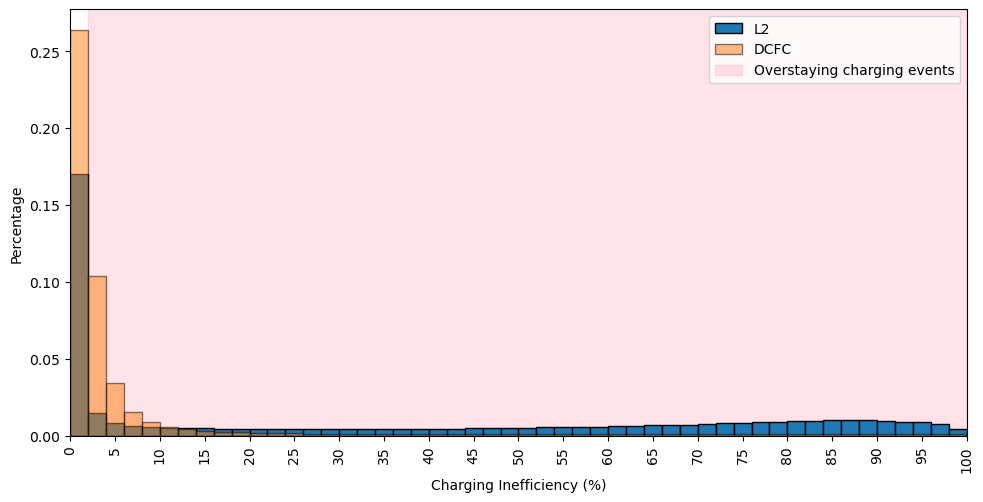

In [31]:
# overlayed histograms with shaded area after the first bar labeled as "overstaying charging events"
bins = np.linspace(0, 100, 51)  # 50 bins across 0-100

plt.figure(figsize=(10,5))

# L2
plt.hist(L2_eff['charge_inefficieny_%'],
         bins=bins,
         density=True,
         weights=np.ones(len(L2_eff['charge_inefficieny_%'])) / len(L2_eff['charge_inefficieny_%']) * 100,
         edgecolor="black",
         label='L2',
         zorder=2)

# DCFC
plt.hist(L3_eff['charge_inefficieny_%'],
         bins=bins,
         density=True,
         weights=np.ones(len(L3_eff['charge_inefficieny_%'])) / len(L3_eff['charge_inefficieny_%']) * 100,
         edgecolor="black",
         alpha=0.5,
         label='DCFC',
         zorder=2)

# Shade area after the first bar (i.e., from bins[1] to max)
plt.axvspan(bins[1], bins[-1], color='#FF91A4', alpha=0.25, label='Overstaying charging events', zorder=1)

plt.ylabel('Percentage')
plt.xlabel('Charging Inefficiency (%)')
plt.xlim(0, 100)
plt.margins(x=0)
plt.tight_layout()
plt.xticks(np.linspace(0,100,21), rotation='vertical')  # fewer ticks for readability
plt.legend()
plt.savefig(r"C:\Users\kenny\OneDrive - purdue.edu\Documents\Kenny's File\Transportation Literature\Fall 2024\CE 699 Ph.D. Thesis\evwatts\charge_inefficiency",
           dpi=750)
plt.show()


(array([9.816111e+06, 1.902430e+05, 6.187300e+04, 2.192700e+04,
        1.097900e+04, 6.647000e+03, 2.964000e+03, 1.862000e+03,
        1.553000e+03, 1.338000e+03, 9.000000e+02, 5.480000e+02,
        4.560000e+02, 3.210000e+02, 2.860000e+02, 3.080000e+02,
        2.020000e+02, 1.410000e+02, 1.340000e+02, 1.460000e+02,
        1.320000e+02, 1.030000e+02, 6.600000e+01, 4.000000e+00,
        1.000000e+00, 7.000000e+00, 4.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        1.000000e+00, 1.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 0.000000e+00, 0.000000e+00, 0.000000e+00,
        0.000000e+00, 1.000000e+00]),
 array([1.66666667e-02, 1.87288833e+03, 3.74576000e+03, 5.61863167e+03,
        7.49150333e+03, 9.36437500e+03, 1.12372467e+04, 1.31101183e+04,
        1.49829900e+04, 1.68558617e+04, 1.87287333

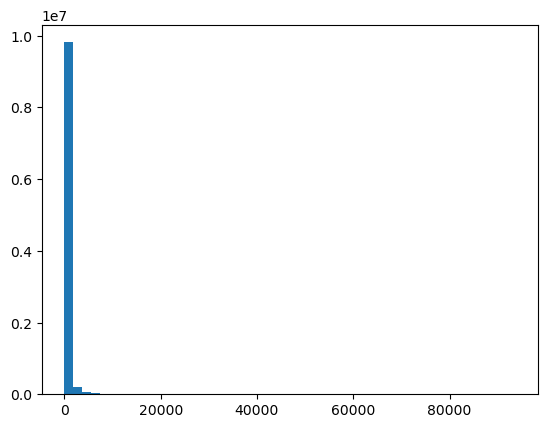

In [29]:
plt.hist(L2_eff['uncharged_duration']*60, bins = 50)

## Venue

In [15]:
# Get all unique values in 'Column1'
# unique_values = combined_data['venue'].unique()

# print(unique_values)
value_counts = combined_data['venue'].value_counts()
value_counts

Single Family Residential        3904859
Multi-Unit Dwelling              1475449
Corridor                         1327551
Business Office                  1301583
Undesignated                     1221153
Medical or Educational Campus     776609
Municipal Building                661829
Multi-use Parking Garage/Lot      607823
Retail                            538620
Leisure Destination               351873
Fleet                             308524
Hotel                             133729
Transit Facility                   87970
Name: venue, dtype: int64

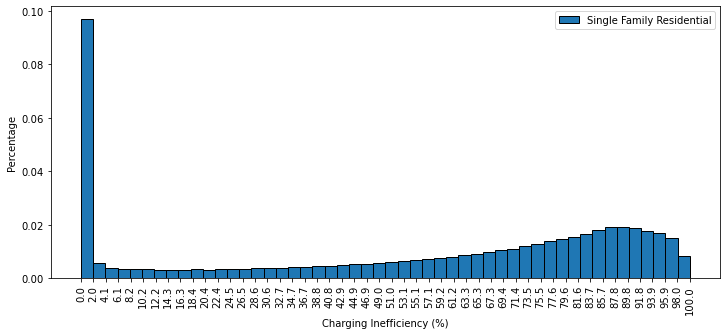

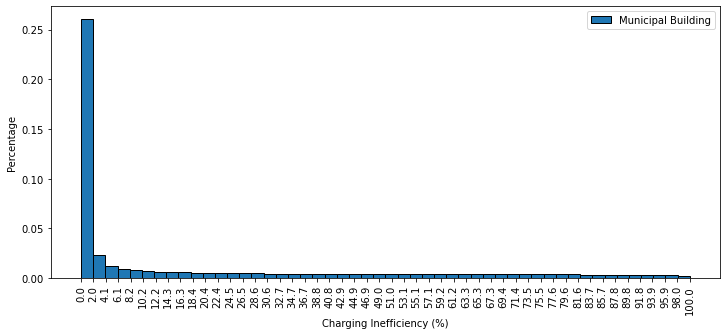

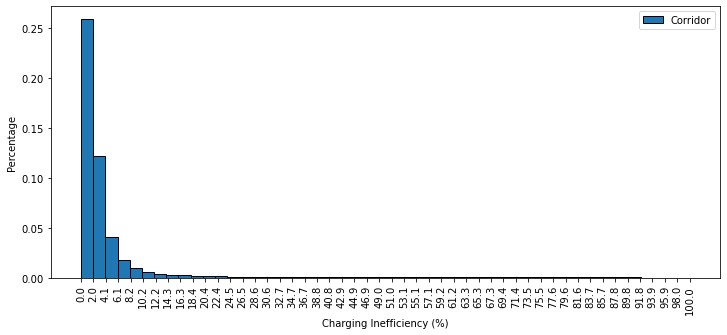

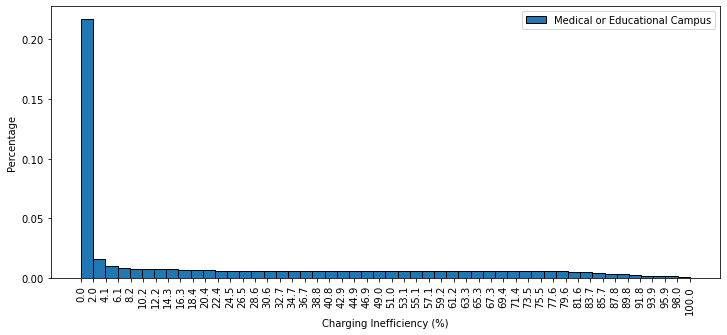

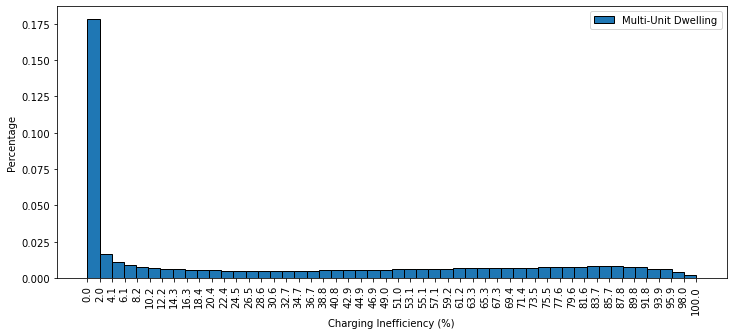

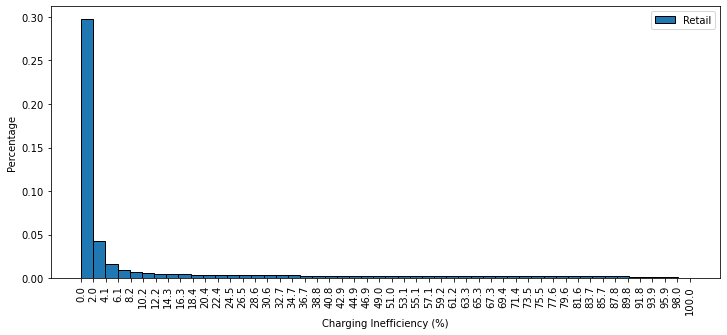

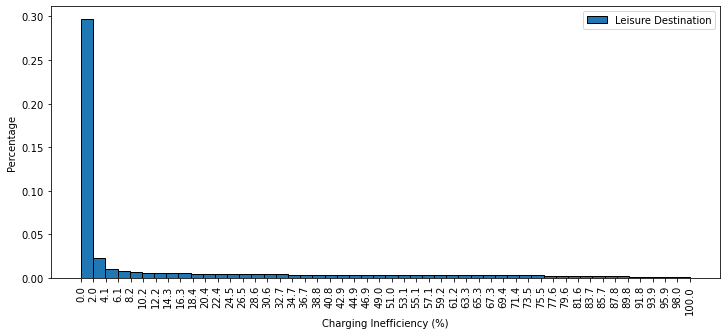

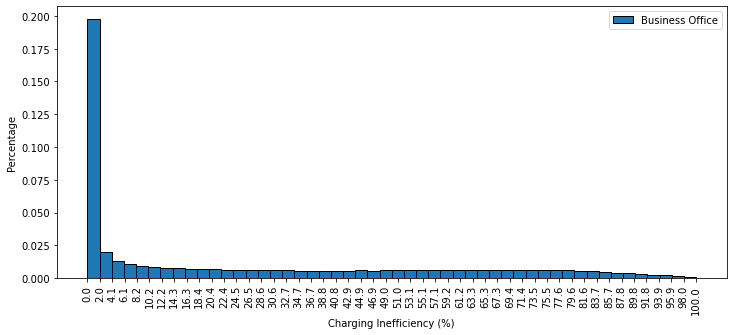

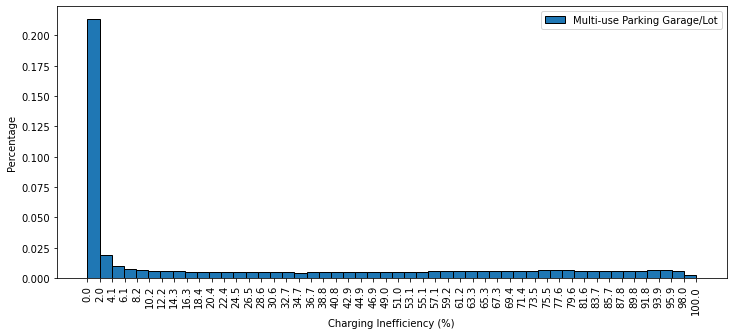

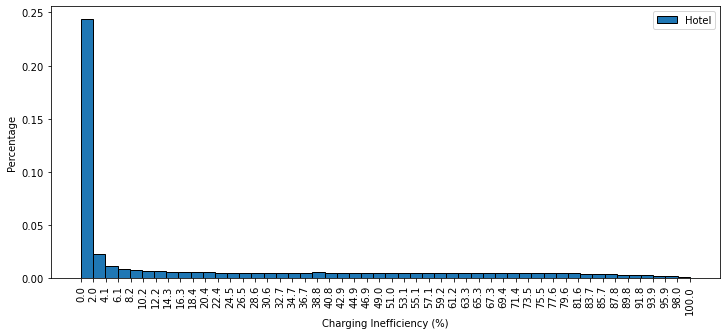

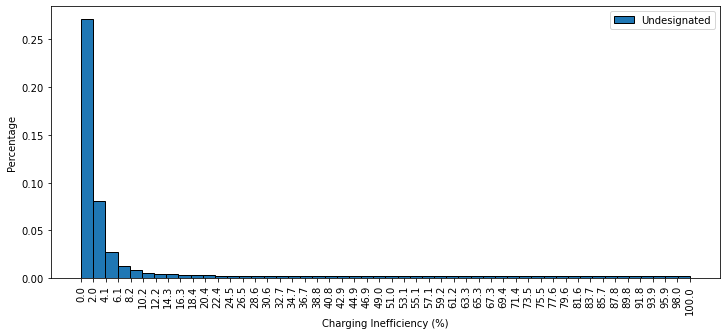

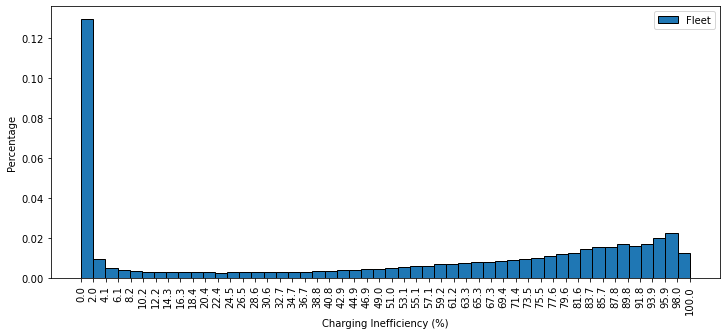

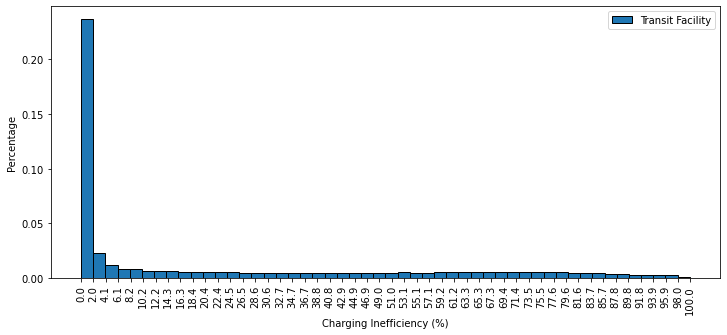

In [10]:
locs = combined_data['venue'].unique()
for loc in locs:
    loc_eff = combined_data[combined_data['venue'] == str(loc)]
    loc_eff = loc_eff.dropna(subset=['charge_inefficieny_%'])
    loc_eff = loc_eff[(loc_eff['charge_inefficieny_%'] > 0) & (loc_eff['charge_inefficieny_%'] < 100)]
    
    plt.figure(figsize=(12,5))
    plt.hist(loc_eff['charge_inefficieny_%'], 
             density=True, 
             weights=np.ones(len(loc_eff['charge_inefficieny_%'])) / len(loc_eff['charge_inefficieny_%']) * 100, 
             bins = 50,
             edgecolor="black",
             label = str(loc))
    plt.ylabel('Percentage')
    plt.xlabel('Charging Inefficiency (%)')
    plt.xticks(np.linspace(0,100,50), rotation ='vertical')
    plt.legend()
    plt.show()

## Pricing

In [12]:
# print(unique_values)
value_counts = combined_data['pricing'].value_counts()
value_counts

Free            7587171
Paid            3064162
Undesignated    2046239
Name: pricing, dtype: int64

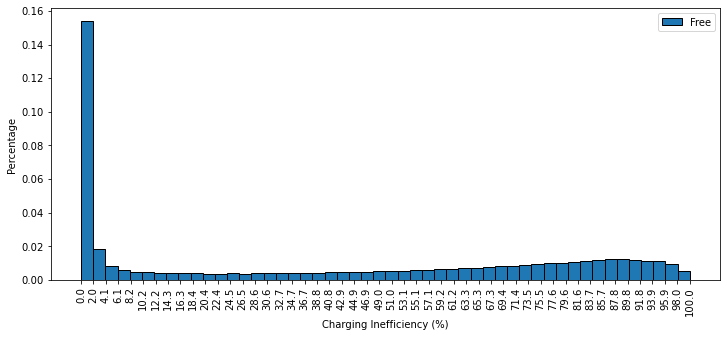

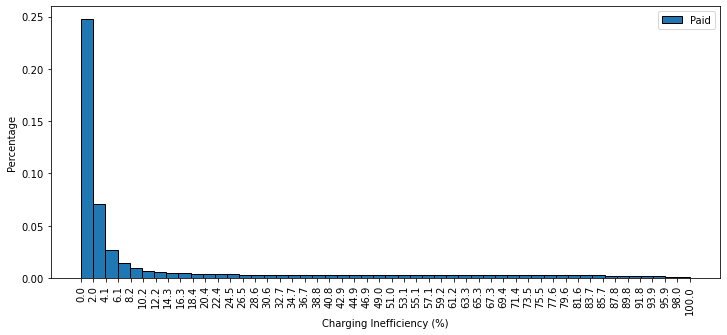

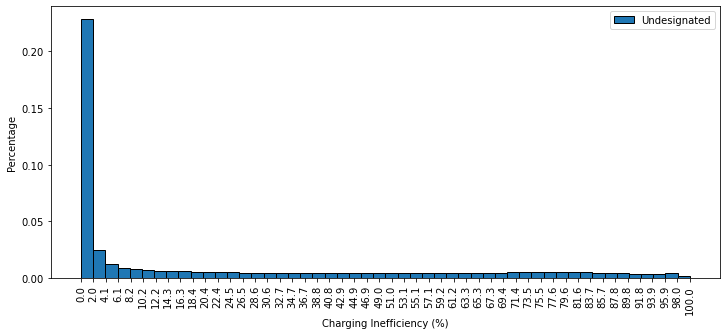

In [13]:
pricing = combined_data['pricing'].unique()
for prc in pricing:
    prc_eff = combined_data[combined_data['pricing'] == str(prc)]
    prc_eff = prc_eff.dropna(subset=['charge_inefficieny_%'])
    prc_eff = prc_eff[(prc_eff['charge_inefficieny_%'] > 0) & (prc_eff['charge_inefficieny_%'] < 100)]
    
    plt.figure(figsize=(12,5))
    plt.hist(prc_eff['charge_inefficieny_%'], 
             density=True, 
             weights=np.ones(len(prc_eff['charge_inefficieny_%'])) / len(prc_eff['charge_inefficieny_%']) * 100, 
             bins = 50,
             edgecolor="black",
             label = str(prc))
    plt.ylabel('Percentage')
    plt.xlabel('Charging Inefficiency (%)')
    plt.xticks(np.linspace(0,100,50), rotation ='vertical')
    plt.legend()
    plt.show()

## SoC vs Location

In [25]:
socvsloc = combined_data[['start_soc', 'venue']]
socvsloc = socvsloc[socvsloc['venue'] != 'Undesignated']
socvsloc = socvsloc.dropna()

In [26]:
socvsloc['venue'].value_counts()

Corridor                         1261868
Business Office                     4847
Leisure Destination                 3037
Multi-use Parking Garage/Lot        1808
Transit Facility                    1060
Fleet                                863
Municipal Building                   516
Multi-Unit Dwelling                  305
Hotel                                130
Medical or Educational Campus        113
Name: venue, dtype: int64

In [27]:
# Step 2: Classify 'venue' as 'Public' if not in specified venues
private_loc = ['Single Family Residential', 'Multi-Unit Dwelling', 'Fleet']
socvsloc['venue'] = socvsloc['venue'].apply(lambda x: x if x in private_loc else 'Public')

In [24]:
socvsloc['venue'].value_counts()

Public                 1273379
Fleet                      863
Multi-Unit Dwelling        305
Name: venue, dtype: int64

In [47]:
socvsloc[socvsloc['venue'] == 'Multi-Unit Dwelling']['start_soc'].describe()

count    305.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: start_soc, dtype: float64

In [48]:
socvsloc[socvsloc['venue'] == 'Multi-Unit Dwelling']['start_soc']

1813960    0.0
1813961    0.0
1813962    0.0
1813963    0.0
1813964    0.0
          ... 
7360948    0.0
7360949    0.0
7360950    0.0
7360951    0.0
7360953    0.0
Name: start_soc, Length: 305, dtype: float64

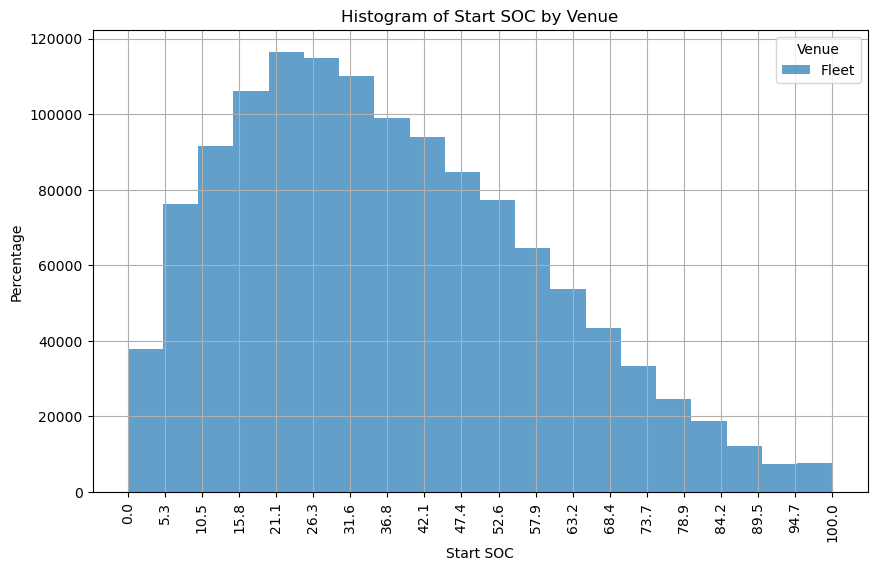

In [39]:

# Step 3: Create a histogram for 'start_soc' with 20 bins, comparing percentages for different venues
plt.figure(figsize=(10, 6))

# Create the histogram with 20 bins and normalize to get percentages
# for venue in socvsloc['venue'].unique():
#     plt.hist(socvsloc[socvsloc['venue'] == venue]['start_soc'], bins=20, alpha=0.5, label=venue, density=True)
#     socvsloc[socvsloc['venue'] == venue]['start_soc'].hist(bins=20, alpha=0.7, label = venue, density = True)

socvsloc[socvsloc['venue'] == 'Public']['start_soc'].hist(bins=20, alpha=0.7, label = 'Public')
# plt.figure(1)
# socvsloc[socvsloc['venue'] == 'Fleet']['start_soc'].hist(bins=20, alpha=0.7, label = venue)
# plt.figure(2)
# socvsloc[socvsloc['venue'] == 'Multi-Unit Dwelling']['start_soc'].hist(bins=20, alpha=0.7, label = venue)
# plt.figure(3)
# plt.hist(socvsloc[socvsloc['venue'] == 'Single Family Residential']['start_soc'], bins=20, alpha=0.5, label=venue, density=True)

plt.xlabel('Start SOC')
plt.ylabel('Percentage')
plt.title('Histogram of Start SOC by Venue')
# plt.legend(title='Venue')
plt.xticks(np.linspace(0,100,20), rotation ='vertical')
# plt.ylim(0,0.05)
plt.grid(True)
plt.show()

## Public Data

In [20]:
pubsession = combined_data.dropna()
pubsession = pubsession[~pubsession['venue'].isin(['Single Family Residential', 'Multi-Unit Dwelling', 'Fleet', 'Undesignated'])]
pubsession = pubsession[~pubsession['pricing'].isin(['Undesignated'])]
pubsession = pubsession[~pubsession['land_use'].isin(['Undesignated'])]

#for binary probit
pubsession['idle'] = pubsession['charge_inefficieny_%'] > 0

# choose only March 2022
pubsession = pubsession[(pubsession['year'] == 2022) & (pubsession['month'] == 3)]

pubsession.shape

(43740, 34)

In [21]:
pubsession['idle'].value_counts()

True     43498
False      242
Name: idle, dtype: int64

In [13]:
pubsession.columns

Index(['connector_id', 'evse_id', 'connector_number', 'connector_type',
       'power_kw', 'session_id', 'start_datetime', 'end_datetime',
       'total_duration', 'charge_duration', 'energy_kwh', 'start_soc',
       'end_soc', 'flag_id', 'metro_area', 'land_use', 'region', 'num_ports',
       'charge_level', 'venue', 'pricing', 'uncharged_duration',
       'charge_inefficieny_%', 'start_day', 'end_day', 'start_is_weekday',
       'end_is_weekday', 'start_hour', 'end_hour', 'start_time_of_day',
       'end_time_of_day'],
      dtype='object')

In [22]:
# Replace 'target_column' with your actual target variable and 'nominal_column' with nominal variables
X = pubsession.drop(columns='charge_inefficieny_%')
y = pubsession['charge_inefficieny_%']
y = list(y)

# Separate categorical and continuous variables
categorical_cols = ['connector_type', 'land_use', 'region', 'num_ports', 'charge_level'
                    , 'venue', 'pricing', 'start_is_weekday', 'start_time_of_day']
continuous_cols = ['energy_kwh','start_soc']

# One-hot encoding categorical variables
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_cols]), columns=encoder.get_feature_names_out(categorical_cols))

# Combine the continuous and encoded categorical variables
X_final = pd.concat([X_encoded, X[continuous_cols].reset_index(drop=True)], axis=1)

# Add a constant (intercept) to the model
X_final = sm.add_constant(X_final)


In [23]:
X_final.columns

Index(['const', 'connector_type_Combo', 'land_use_Non-Metro',
       'region_East South Central', 'region_Middle Atlantic',
       'region_Mountain', 'region_New England', 'region_Pacific',
       'region_South Atlantic', 'region_West North Central',
       'region_West South Central', 'pricing_Paid', 'start_is_weekday_1',
       'start_time_of_day_Evening', 'start_time_of_day_Morning',
       'start_time_of_day_Night', 'energy_kwh', 'start_soc'],
      dtype='object')

In [24]:
# Fit the OLS model
model = sm.OLS(y, X_final)
results = model.fit()

In [25]:
# Print the summary with detailed parameter estimates
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     106.4
Date:                Sun, 29 Sep 2024   Prob (F-statistic):               0.00
Time:                        15:51:01   Log-Likelihood:            -1.7496e+05
No. Observations:               43740   AIC:                         3.500e+05
Df Residuals:                   43722   BIC:                         3.501e+05
Df Model:                          17                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [48]:
L2_eff.describe()

,connector_id,evse_id,connector_number,session_id,total_duration,charge_duration,energy_kwh,start_soc,end_soc,flag_id,num_ports,uncharged_duration,charge_inefficieny_%
count,1.011926e+07,1.011926e+07,1.011926e+07,1.011926e+07,1.011926e+07,1.011926e+07,1.011926e+07,12671.0,0.0,1.011926e+07,1.011926e+07,1.011926e+07,1.011926e+07
mean,1.812698e+04,1.211078e+04,1.290144e+00,7.440309e+06,8.822005e+00,2.907798e+00,1.468493e+01,0.0,NaN,3.382450e+00,1.552934e+00,5.914207e+00,3.684142e+01
std,1.272817e+04,9.084062e+03,4.538287e-01,4.350251e+06,1.700078e+01,3.320226e+00,1.435223e+01,0.0,NaN,3.243361e+01,4.971901e-01,1.632824e+01,3.568841e+01
min,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,5.555556e-04,2.777778e-04,0.000000e+00,0.0,NaN,0.000000e+00,1.000000e+00,2.777778e-04,1.664641e-04
25%,8.018000e+03,4.774000e+03,1.000000e+00,3.245918e+06,1.808333e+00,1.165278e+00,4.902000e+00,0.0,NaN,0.000000e+00,1.000000e+00,6.111111e-03,5.681818e-01
50%,1.407400e+04,9.634000e+03,1.000000e+00,7.764167e+06,4.626389e+00,2.153611e+00,9.656375e+00,0.0,NaN,0.000000e+00,2.000000e+00,9.625000e-01,2.838089e+01
75%,2.564700e+04,1.663600e+04,2.000000e+00,1.140730e+07,1.140972e+01,3.839722e+00,1.944000e+01,0.0,NaN,0.000000e+00,2.000000e+00,7.330000e+00,7.256842e+01
max,5.477500e+04,4.170100e+04,2.000000e+00,1.483715e+07,1.561828e+03,6.971164e+02,5.629437e+02,0.0,NaN,3.220000e+02,2.000000e+00,1.560727e+03,9.999975e+01


In [54]:
L3_eff.describe()

,connector_id,evse_id,connector_number,session_id,total_duration,charge_duration,energy_kwh,start_soc,end_soc,flag_id,num_ports,uncharged_duration,charge_inefficieny_%
count,2.406479e+06,2.406479e+06,2.406479e+06,2.406479e+06,2.406479e+06,2.406479e+06,2.406479e+06,2.361430e+06,2.388047e+06,2.406479e+06,2406479.0,2.406479e+06,2.406479e+06
mean,1.951107e+04,1.309576e+04,1.237626e+00,7.186027e+06,1.435904e+00,9.098736e-01,2.852074e+01,3.957227e+01,7.961625e+01,4.571142e+00,1.0,5.260307e-01,8.524192e+00
std,1.332660e+04,9.640129e+03,4.256289e-01,3.731791e+06,5.537067e+00,2.161018e+00,3.822866e+01,2.245018e+01,1.998699e+01,3.737691e+01,0.0,4.955750e+00,1.904919e+01
min,2.770000e+02,1.450000e+02,1.000000e+00,3.103300e+04,1.944444e-03,2.777778e-04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.0,2.777778e-04,1.414256e-04
25%,2.772000e+03,1.717000e+03,1.000000e+00,4.690802e+06,3.677778e-01,3.477778e-01,9.800000e+00,2.200000e+01,7.000000e+01,0.000000e+00,1.0,6.111111e-03,8.099899e-01
50%,2.802200e+04,1.813500e+04,1.000000e+00,7.382648e+06,6.425000e-01,6.091667e-01,1.925600e+01,3.700000e+01,8.500000e+01,0.000000e+00,1.0,9.722222e-03,1.843525e+00
75%,2.868600e+04,1.856500e+04,1.000000e+00,1.088034e+07,1.081389e+00,1.013056e+00,3.448800e+01,5.500000e+01,9.600000e+01,0.000000e+00,1.0,1.638889e-02,4.267892e+00
max,5.469500e+04,4.166300e+04,2.000000e+00,1.453410e+07,6.909800e+02,6.426486e+02,9.362060e+02,1.000000e+02,1.000000e+02,3.260000e+02,1.0,6.909633e+02,9.999824e+01


In [40]:
nan_count = combined_data['charge_inefficieny_%'].isna().sum()
nan_count

494

In [41]:
nan_count = L2_eff['charge_inefficieny_%'].isna().sum()
nan_count

0

In [42]:
combined_data.dtypes

connector_id              int64
evse_id                   int64
connector_number          int64
connector_type           object
power_kw                 object
session_id                int64
start_datetime           object
end_datetime             object
total_duration          float64
charge_duration         float64
energy_kwh              float64
start_soc               float64
end_soc                 float64
flag_id                   int64
metro_area               object
land_use                 object
region                   object
num_ports                 int64
charge_level             object
venue                    object
pricing                  object
uncharged_duration      float64
charge_inefficieny_%    float64
dtype: object

In [46]:
combined_data.shape

(12697572, 23)

In [52]:
# Get all unique values in 'Column1'
unique_values = combined_data['charge_level'].unique()

print(unique_values)

['L2' 'DCFC']
